## Basic setup and import

In [1]:
import pandas as pd

# Load CSVs
users = pd.read_csv("users.csv")
skills = pd.read_csv("user_skills_flat.csv")
content = pd.read_csv("user_content_flat.csv")
profiles = pd.read_csv("user_learning_profiles.csv")

# Quick check
print("✅ Files loaded successfully")
for name, df in {"users": users, "skills": skills, "content": content, "profiles": profiles}.items():
    print(f"\n{name.upper()} — Shape: {df.shape}")
    print(df.head(2))


✅ Files loaded successfully

USERS — Shape: (5000, 6)
                                     id              email first_name  \
0  395fa3d8-d664-44eb-b0ab-a74f13623e29  user1@example.com      Name1   
1  84794fda-87a6-4ca9-b376-4fbde4badc6c  user2@example.com      Name2   

  last_name                   role                  created_at  
0  Surname1   Data Science Learner  2025-02-12T11:19:46.406195  
1  Surname2  Web Developer Learner  2025-06-12T11:19:46.406222  

SKILLS — Shape: (5000, 4)
                                     id                               user_id  \
0  5c10c91d-c483-4080-b629-a8326fbb4357  395fa3d8-d664-44eb-b0ab-a74f13623e29   
1  4f271960-b4d6-44b3-ae11-d5e8d4a6ea85  84794fda-87a6-4ca9-b376-4fbde4badc6c   

                                              skills  \
0  {"Problem Solving": {"category": "Soft Skills"...   
1  {"Communication Skills": {"category": "Program...   

                   updated_at  
0  2025-10-30T11:19:46.437954  
1  2025-10-30T11:19:46.4380

## Basic Cleaning

In [3]:
# 🧽 Remove duplicates
for df in [users, skills, content, profiles]:
    df.drop_duplicates(inplace=True)

# 🧩 Clean column names
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

users = clean_columns(users)
skills = clean_columns(skills)
content = clean_columns(content)
profiles = clean_columns(profiles)

# 🔍 Missing values overview
print("\n🔍 Missing values per dataset:")
for name, df in {"users": users, "skills": skills, "content": content, "profiles": profiles}.items():
    print(f"\n{name.upper()}")
    print(df.isnull().sum())

# 🧠 Conditional filling — only if the column exists
if "age" in users.columns:
    users["age"].fillna(users["age"].median(), inplace=True)

if "skill_level" in skills.columns:
    skills["skill_level"].fillna(skills["skill_level"].mode()[0], inplace=True)

# For everything else, just fill NAs with "Unknown"
users.fillna("Unknown", inplace=True)
skills.fillna("Unknown", inplace=True)
content.fillna("Unknown", inplace=True)
profiles.fillna("Unknown", inplace=True)




🔍 Missing values per dataset:

USERS
id            0
email         0
first_name    0
last_name     0
role          0
created_at    0
dtype: int64

SKILLS
id            0
user_id       0
skills        0
updated_at    0
dtype: int64

CONTENT
id            0
user_id       0
items         0
updated_at    0
dtype: int64

PROFILES
id               0
user_id          0
latest_result    0
answers          0
updated_at       0
dtype: int64


In [4]:
# Basic overview
for name, df in {"users": users, "skills": skills, "content": content, "profiles": profiles}.items():
    print(f"\n{name.upper()} INFO")
    print(df.info())
    print(df.describe(include='all'))

# Example: Count of users per role (if column exists)
if "role" in users.columns:
    print("\nUsers per Role:")
    print(users["role"].value_counts())

# Example: Average skill level (if numeric)
if "skill_level" in skills.columns:
    print("\nAverage Skill Level:")
    print(skills["skill_level"].mean())

# Example: Top 5 most common skills
if "skill_name" in skills.columns:
    print("\nTop 5 Skills:")
    print(skills["skill_name"].value_counts().head())

# Example: Learning type distribution
if "learning_style" in profiles.columns:
    print("\nLearning Style Distribution:")
    print(profiles["learning_style"].value_counts())



USERS INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5000 non-null   object
 1   email       5000 non-null   object
 2   first_name  5000 non-null   object
 3   last_name   5000 non-null   object
 4   role        5000 non-null   object
 5   created_at  5000 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB
None
                                          id              email first_name  \
count                                   5000               5000       5000   
unique                                  5000               5000       5000   
top     395fa3d8-d664-44eb-b0ab-a74f13623e29  user1@example.com      Name1   
freq                                       1                  1          1   

       last_name           role                  created_at  
count       5000           5000                        5000  


In [5]:
users.to_csv("clean_users.csv", index=False)
skills.to_csv("clean_user_skills.csv", index=False)
content.to_csv("clean_user_content.csv", index=False)
profiles.to_csv("clean_user_profiles.csv", index=False)

print("\n💾 Cleaned files saved. Ready for Tableau import.")



💾 Cleaned files saved. Ready for Tableau import.


## USERS table

In [5]:
import sqlite3

# Create sample DataFrame
users_df = pd.DataFrame({
    "user_id": [1, 2, 3],
    "name": ["Alice", "Bob", "Carla"],
    "role": ["Data Scientist", "Web Developer", "Data Analyst"],
    "department": ["Analytics", "Engineering", "Finance"]
})

# Connect and insert
conn = sqlite3.connect("shop.db")

users_df.to_sql(
    "users",
    con=conn,
    index=False,
    if_exists="append"
)

conn.close()
print("✅ Users table populated.")


✅ Users table populated.


In [7]:
# Create sample DataFrame
skills_df = pd.DataFrame({
    "user_id": [1, 1, 2, 3, 3],
    "skill_name": ["Python", "SQL", "JavaScript", "Excel", "Power BI"],
    "skill_level": ["Advanced", "Intermediate", "Advanced", "Intermediate", "Beginner"]
})

# Connect and insert
conn = sqlite3.connect("shop.db")

skills_df.to_sql(
    "skills",
    con=conn,
    index=False,
    if_exists="append"
)

conn.close()
print("✅ Skills table populated.")

✅ Skills table populated.


In [8]:
# Create sample DataFrame
content_df = pd.DataFrame({
    "user_id": [1, 2, 3],
    "title": ["Intro to Python", "Web Dev Basics", "Data Visualization"],
    "content_type": ["Course", "Video", "Article"],
    "completion": [0.9, 0.8, 0.7]
})

# Connect and insert
conn = sqlite3.connect("shop.db")

content_df.to_sql(
    "content",
    con=conn,
    index=False,
    if_exists="append"
)

conn.close()
print("✅ Content table populated.")

✅ Content table populated.


In [9]:
# Create sample DataFrame
profiles_df = pd.DataFrame({
    "user_id": [1, 2, 3],
    "learning_style": ["Visual", "Auditory", "Reading/Writing"],
    "motivation": ["Career growth", "Project need", "Personal interest"]
})

# Connect and insert
conn = sqlite3.connect("shop.db")

profiles_df.to_sql(
    "learning_profiles",
    con=conn,
    index=False,
    if_exists="append"
)

conn.close()
print("✅ Learning profiles table populated.")

✅ Learning profiles table populated.


✓ total_learners.csv exported (1 rows)


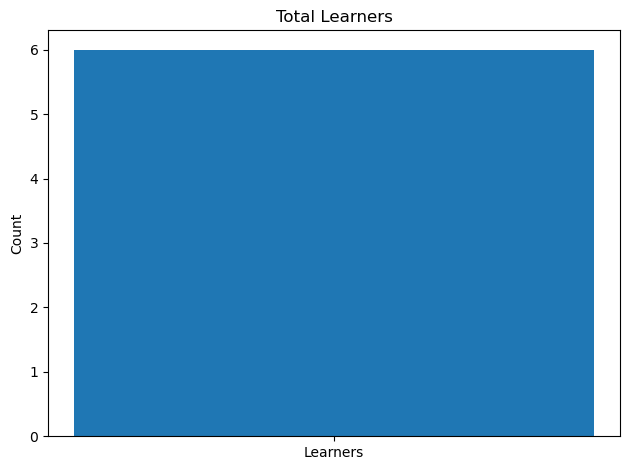

✓ skill_level_distribution.csv exported (3 rows)


<Figure size 640x480 with 0 Axes>

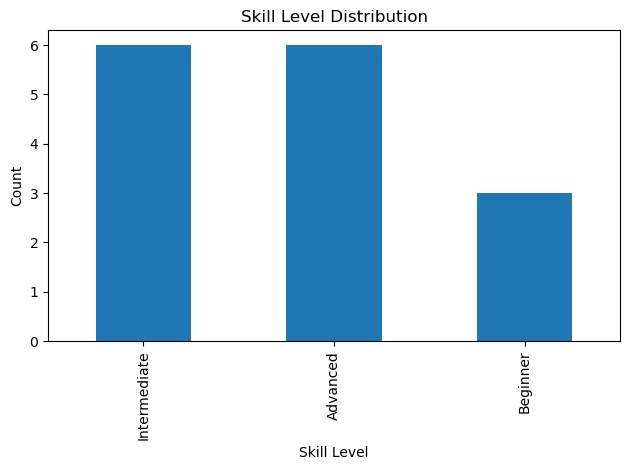

✓ figures/skill_level_distribution.png saved
✓ top_10_skills.csv exported (5 rows)


<Figure size 640x480 with 0 Axes>

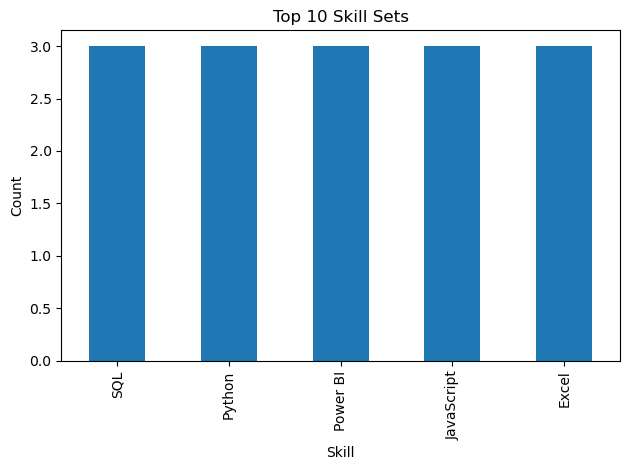

✓ figures/top_10_skills.png saved
✓ learners_per_role.csv exported (3 rows)


<Figure size 640x480 with 0 Axes>

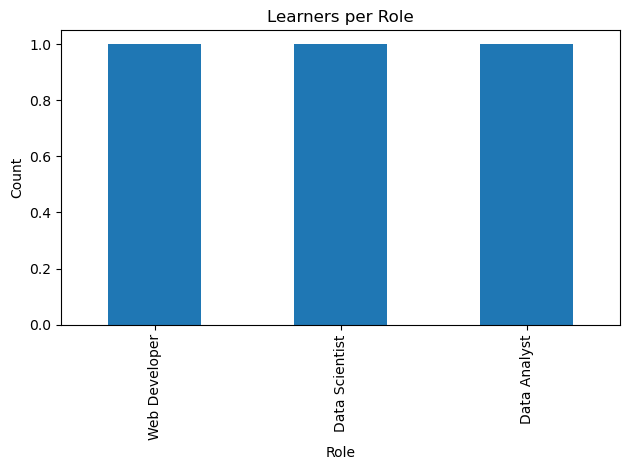

✓ figures/learners_per_role.png saved
✓ skill_level_by_role.csv exported (5 rows)


<Figure size 640x480 with 0 Axes>

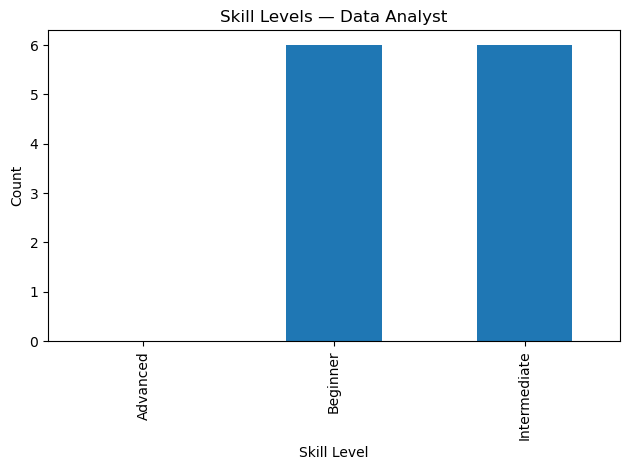

✓ figures/skill_levels_Data_Analyst.png saved


<Figure size 640x480 with 0 Axes>

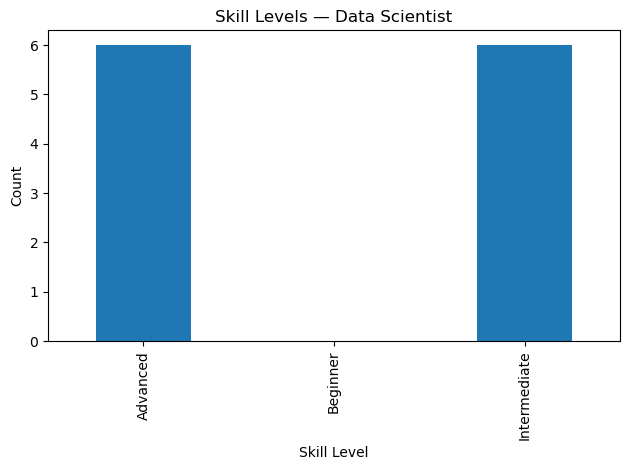

✓ figures/skill_levels_Data_Scientist.png saved


<Figure size 640x480 with 0 Axes>

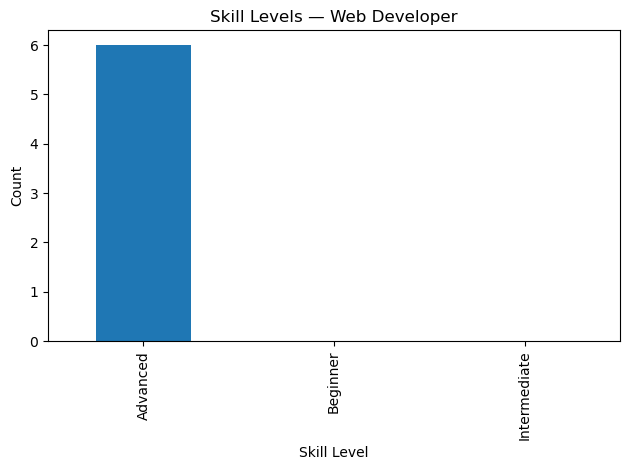

✓ figures/skill_levels_Web_Developer.png saved
✓ top_skills_per_role.csv exported (5 rows)


<Figure size 640x480 with 0 Axes>

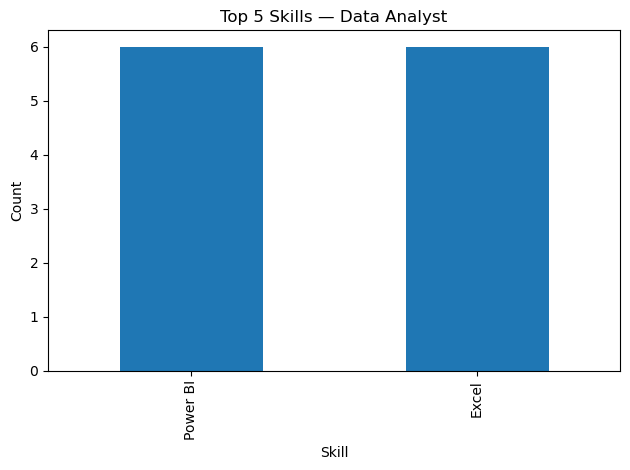

✓ figures/top5_skills_Data_Analyst.png saved


<Figure size 640x480 with 0 Axes>

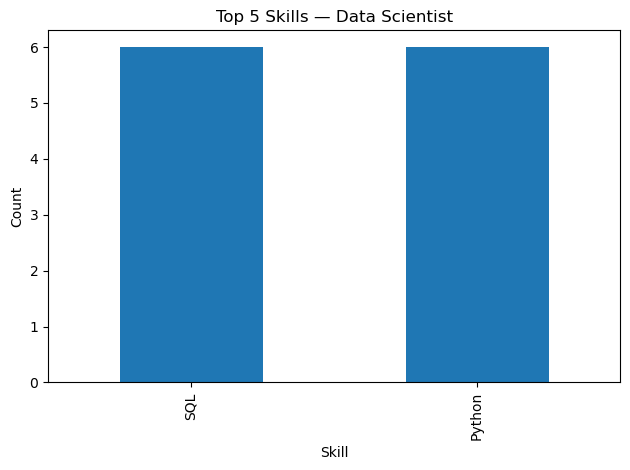

✓ figures/top5_skills_Data_Scientist.png saved


<Figure size 640x480 with 0 Axes>

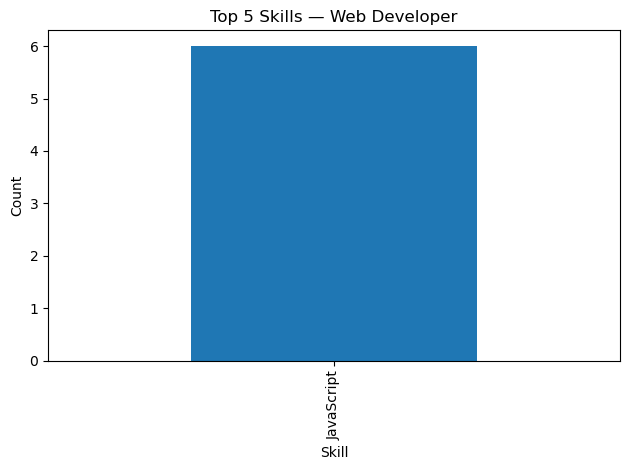

✓ figures/top5_skills_Web_Developer.png saved
✓ learning_style_distribution.csv exported (3 rows)


<Figure size 640x480 with 0 Axes>

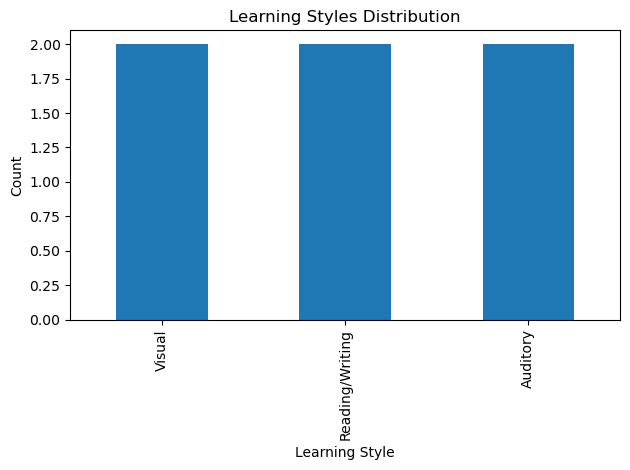

✓ figures/learning_style_distribution.png saved
✓ avg_completion_by_content_type.csv exported (3 rows)


<Figure size 640x480 with 0 Axes>

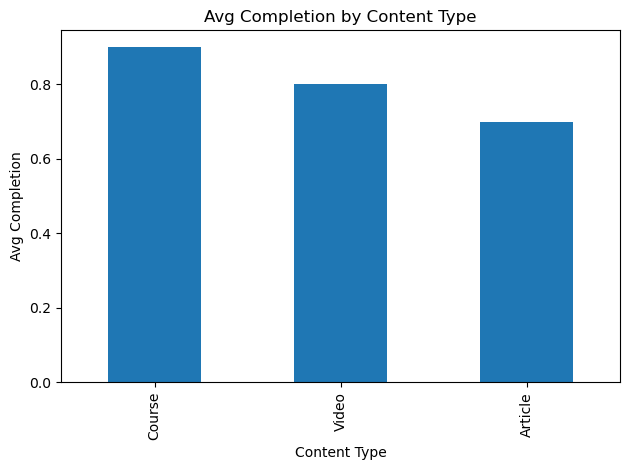

✓ figures/avg_completion_by_content_type.png saved
✓ completion_bands.csv exported (2 rows)


<Figure size 640x480 with 0 Axes>

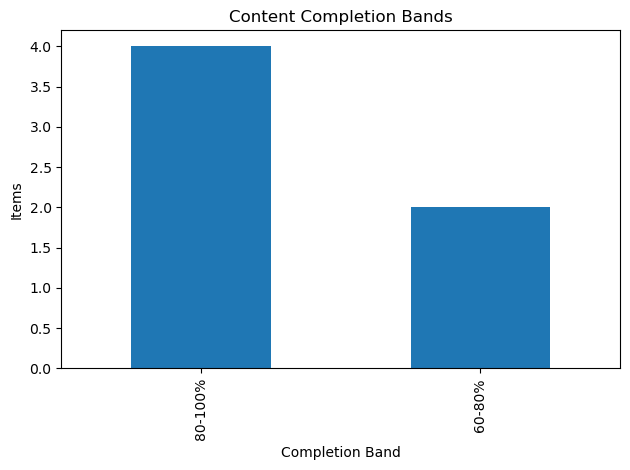

✓ figures/completion_bands.png saved

All done. CSVs in /exports and PNGs in /figures 🚀


In [13]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

DB = "shop.db"
os.makedirs("figures", exist_ok=True)
os.makedirs("exports", exist_ok=True)

def run_sql(conn, sql, name):
    df = pd.read_sql(sql, conn)
    df.to_csv(f"exports/{name}.csv", index=False)
    print(f"✓ {name}.csv exported ({len(df)} rows)")
    return df

def bar(df, x, y, title, xlabel, ylabel, filename):
    if df.empty:
        print(f"ℹ No data for plot: {title}")
        return
    plt.figure()
    df.plot(x=x, y=y, kind="bar", legend=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.savefig(f"figures/{filename}.png", dpi=150)
    plt.show()
    print(f"✓ figures/{filename}.png saved")

with sqlite3.connect(DB) as conn:
    # 1) Total learners
    q1 = "SELECT COUNT(*) AS total_learners FROM users;"
    df1 = run_sql(conn, q1, "total_learners")
    plt.figure()
    plt.bar(["Learners"], df1["total_learners"])
    plt.title("Total Learners")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig("figures/total_learners.png", dpi=150)
    plt.show()

    # 2) Skill level distribution
    q2 = """
    SELECT skill_level, COUNT(*) AS learners
    FROM skills
    GROUP BY skill_level
    ORDER BY learners DESC;
    """
    df2 = run_sql(conn, q2, "skill_level_distribution")
    bar(df2, "skill_level", "learners",
        "Skill Level Distribution", "Skill Level", "Count",
        "skill_level_distribution")

    # 3) Top 10 skill sets
    q3 = """
    SELECT skill_name, COUNT(*) AS learners
    FROM skills
    GROUP BY skill_name
    ORDER BY learners DESC
    LIMIT 10;
    """
    df3 = run_sql(conn, q3, "top_10_skills")
    bar(df3, "skill_name", "learners",
        "Top 10 Skill Sets", "Skill", "Count",
        "top_10_skills")

    # 4) Learners per role
    q4 = """
    SELECT role, COUNT(DISTINCT user_id) AS learners
    FROM users
    GROUP BY role
    ORDER BY learners DESC;
    """
    df4 = run_sql(conn, q4, "learners_per_role")
    bar(df4, "role", "learners",
        "Learners per Role", "Role", "Count",
        "learners_per_role")

    # 5) Skill level by role (simple cross-tab)
    q5 = """
    SELECT u.role, s.skill_level, COUNT(*) AS cnt
    FROM users u
    JOIN skills s ON s.user_id = u.user_id
    GROUP BY u.role, s.skill_level
    ORDER BY u.role, cnt DESC;
    """
    df5 = run_sql(conn, q5, "skill_level_by_role")

    # Optional: pivot into wide format and plot each role quickly
    if not df5.empty:
        pivot = df5.pivot(index="role", columns="skill_level", values="cnt").fillna(0).astype(int)
        pivot.to_csv("exports/skill_level_by_role_pivot.csv")
        # Plot each role as a small bar (sum per level across roles = bar heights per column)
        for role in pivot.index:
            row = pivot.loc[role].reset_index()
            row.columns = ["skill_level", "count"]
            bar(row, "skill_level", "count",
                f"Skill Levels — {role}", "Skill Level", "Count",
                f"skill_levels_{role.replace(' ', '_')}")

    # 6) Top skills per role (top 5 each)
    q6 = """
    WITH ranked AS (
      SELECT u.role, s.skill_name, COUNT(*) AS cnt,
             ROW_NUMBER() OVER (PARTITION BY u.role ORDER BY COUNT(*) DESC) AS rn
      FROM users u
      JOIN skills s ON s.user_id = u.user_id
      GROUP BY u.role, s.skill_name
    )
    SELECT role, skill_name, cnt
    FROM ranked
    WHERE rn <= 5
    ORDER BY role, cnt DESC;
    """
    df6 = run_sql(conn, q6, "top_skills_per_role")
    # Plot one chart per role (keeps it simple)
    if not df6.empty:
        for role, chunk in df6.groupby("role"):
            bar(chunk, "skill_name", "cnt",
                f"Top 5 Skills — {role}", "Skill", "Count",
                f"top5_skills_{role.replace(' ', '_')}")

    # 7) Learning styles distribution
    q7 = """
    SELECT learning_style, COUNT(*) AS learners
    FROM learning_profiles
    GROUP BY learning_style
    ORDER BY learners DESC;
    """
    df7 = run_sql(conn, q7, "learning_style_distribution")
    bar(df7, "learning_style", "learners",
        "Learning Styles Distribution", "Learning Style", "Count",
        "learning_style_distribution")

    # 8) Completion by content type (avg completion)
    q8 = """
    SELECT content_type, ROUND(AVG(completion), 3) AS avg_completion
    FROM content
    GROUP BY content_type
    ORDER BY avg_completion DESC;
    """
    df8 = run_sql(conn, q8, "avg_completion_by_content_type")
    bar(df8, "content_type", "avg_completion",
        "Avg Completion by Content Type", "Content Type", "Avg Completion",
        "avg_completion_by_content_type")

    # 9) Completion distribution (simple bins)
    q9 = """
    SELECT
      CASE
        WHEN completion < 0.2 THEN '0-20%'
        WHEN completion < 0.4 THEN '20-40%'
        WHEN completion < 0.6 THEN '40-60%'
        WHEN completion < 0.8 THEN '60-80%'
        WHEN completion <= 1.0 THEN '80-100%'
        ELSE 'Unknown'
      END AS completion_band,
      COUNT(*) AS items
    FROM content
    GROUP BY completion_band
    ORDER BY items DESC;
    """
    df9 = run_sql(conn, q9, "completion_bands")
    bar(df9, "completion_band", "items",
        "Content Completion Bands", "Completion Band", "Items",
        "completion_bands")

print("\nAll done. CSVs in /exports and PNGs in /figures 🚀")
